In [1]:
#import Pillow (fork of PIL - python image library) to do image stuff
from PIL import Image
import random as rand

In [2]:
#create a new image 100 x 100 pixels in size. The "1" is the mode for the image, in this case black or white
def create_canvas():
    img = Image.new("1",[100,100])
    return img

In [3]:
#take paramters for drawing the line
def take_points():
    points = []
    temp = []
#    x_start = (int)(input('What is the x-coordinate of one point?\n'))
#    y_start = (int)(input('What is the y-coordinate of one point?\n'))
    x_start = rand.randint(0,99)
    y_start = rand.randint(0,99)
    temp.append(x_start)
    temp.append(y_start)
    points.append(temp)
    temp = []
#    x_end = (int)(input('What is the x-coordinate of the other point?\n'))
#    y_end = (int)(input('What is the y-coordinate of the other point?\n'))
    x_end = rand.randint(0,99)
    y_end = rand.randint(0,99)
    temp.append(x_end)
    temp.append(y_end)
    points.append(temp)
    return points

In [4]:
def arrange(r,q,index_max):
    partition = []
    if r == 0 or index_max == r:
        for i in range(index_max):
            partition.append(q)
    else:
        if index_max < 2*r:
            for i in range(r):
                partition.append(q+1)
            n = r//(index_max-r)
            i = n
            while i < len(partition):
                partition.insert(i, q)
                i += (n+1)
        elif index_max == 2*r:
            for i in range(r):
                partition.append(q+1)
                partition.append(q)
        else:
            for i in range(index_max-r-1):
                partition.append(q) 
            n = (index_max-r-1)//r
            i = n
            while i < len(partition):
                partition.insert(i, q+1)
                i += (n+1)
    return partition

In [5]:
# draw the line given the starting and end point
def draw_line(points):
    start_x = points[0][0]
    end_x = points[1][0]
    start_y = points[0][1]
    end_y = points[1][1]
    dif_x = abs(start_x-end_x)+1
    dif_y = abs(start_y-end_y)+1
    if dif_x > dif_y:
        r = dif_x%dif_y
        q = dif_x//dif_y
        partition = arrange(r,q,dif_y-1)
        if (start_x < end_x) and (start_y < end_y):
            row = start_y
            x_count = start_x
            for length_line in partition:
                for x_coord in range(x_count, x_count+length_line):
                    pixels[x_coord,row] = (1)
                row+=1
                x_count+=length_line
        elif (start_x > end_x) and (start_y > end_y):
            row = end_y
            x_count = end_x
            for length_line in partition:
                for x_coord in range(x_count, x_count+length_line):
                    pixels[x_coord,row] = (1)
                row+=1
                x_count+=length_line
        elif (start_x < end_x) and (start_y > end_y):
            row = start_y
            x_count = start_x
            for length_line in partition:
                for x_coord in range(x_count, x_count+length_line):
                    pixels[x_coord,row] = (1)
                row-=1
                x_count+=length_line
        elif (start_x > end_x) and (start_y < end_y):
            row = end_y
            x_count = end_x
            for length_line in partition:
                for x_coord in range(x_count, x_count+length_line):
                    pixels[x_coord,row] = (1)
                row-=1
                x_count+=length_line
        else:
            if start_x == end_x:
                if start_y < end_y:
                    for y_coord in range(start_y, end_y+1):
                        pixels[start_x, y_coord]
                else:
                    for y_coord in range(end_y, start_y+1):
                        pixels[start_x, y_coord]
            else:
                if start_x < end_X:
                    for x_coord in range(start_x, end_x+1):
                        pixels[x_coord, start_y]
                else:
                    for x_coord in range(end_x, start_x+1):
                        pixels[x_coord, start_y]
    else:
        r = dif_y%dif_x
        q = dif_y//dif_x
        partition = arrange(r,q,dif_x-1)
        if (start_x < end_x) and (start_y < end_y):
            col = start_x
            y_count = start_y
            for length_line in partition:
                for y_coord in range(y_count, y_count+length_line):
                    pixels[col,y_coord] = (1)
                col+=1
                y_count+=length_line
        elif (start_x > end_x) and (start_y > end_y):
            col = end_x
            y_count = end_y
            for length_line in partition:
                for y_coord in range(y_count, y_count+length_line):
                    pixels[col,y_coord] = (1)
                col+=1
                y_count+=length_line
        elif (start_x < end_x) and (start_y > end_y):
            col = start_x
            y_count = start_y
            for length_line in partition:
                for y_coord in range(y_count, y_count+length_line):
                    pixels[col,y_coord] = (1)
                col+=1
                y_count-=length_line
                
        elif (start_x > end_x) and (start_y < end_y):
            col = end_x
            y_count = end_y
            for length_line in partition:
                for y_coord in range(y_count, y_count+length_line):
                    pixels[col,y_coord] = (1)
                col+=1
                y_count-=length_line
        else:
            if start_x == end_x:
                if start_y < end_y:
                    for y_coord in range(start_y, end_y+1):
                        pixels[start_x, y_coord]
                else:
                    for y_coord in range(end_y, start_y+1):
                        pixels[start_x, y_coord]
            else:
                if start_x < end_x:
                    for x_coord in range(start_x, end_x+1):
                        pixels[x_coord, start_y]
                else:
                    for x_coord in range(end_x, start_x+1):
                        pixels[x_coord, start_y]

In [6]:
img = create_canvas()

In [7]:
#load the image into memory to make changes to it
pixels = img.load()

In [8]:
num_lines = rand.randint(1,10)
print('The number of lines is', num_lines)

7


In [9]:
for count in range(num_lines):
    points = take_points()
    print('Starting and ending points:',points)
    draw_line(points)

points: [[4, 54], [26, 53]]
points: [[57, 25], [97, 7]]
points: [[21, 35], [29, 89]]
points: [[54, 47], [75, 31]]
points: [[23, 83], [88, 56]]
points: [[38, 17], [48, 36]]
points: [[43, 1], [12, 90]]


In [10]:
#saven the image as a .png file and then close the image
img.save('non_horizontal_lines.png')

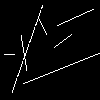

In [11]:
img